Load Data from csv file

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
data=pd.read_csv("Geom(1).csv")
data_train,data_test=train_test_split(data, test_size=.22, random_state=42)
data_test_x=data_test.iloc[:,range(0,data.shape[1],2)]
data_test_y=data_test.iloc[:,range(1,data.shape[1],2)]


Create our model

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 60

# This is our input image
input_img = keras.Input(shape=(data.shape[1],))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='elu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(data.shape[1],activation="linear")(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:


autoencoder.fit(data_train, data_train,
                epochs=100,
                batch_size=256,
                shuffle=True)


Epoch 1/100
1/1 [==============================] - 0s 352ms/step - loss: 11674.8193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10425.7090
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 9334.5566
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8384.0879
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 7556.3857
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 6846.6279
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 6237.4336
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 5718.0337
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 5279.6519
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 4909.1270
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 4592.9800
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 4330.0234
Epoch 13/100
1/1 [==

In [ ]:
encoded_points = encoder.predict(data_test)
decoded_points = decoder.predict(encoded_points)

Evaluate

In [ ]:
print("Evaluate on test data")
results = autoencoder.evaluate(decoded_points,data_test, batch_size=128)
print("test loss,", results)

Evaluate on test data
1/1 [==============================] - 0s 91ms/step - loss: 0.7380
test loss, 0.7379986047744751


In [ ]:
data_test_xdush=decoded_points[:,range(0,data.shape[1],2)]
data_test_ydush=decoded_points[:,range(1,data.shape[1],2)]

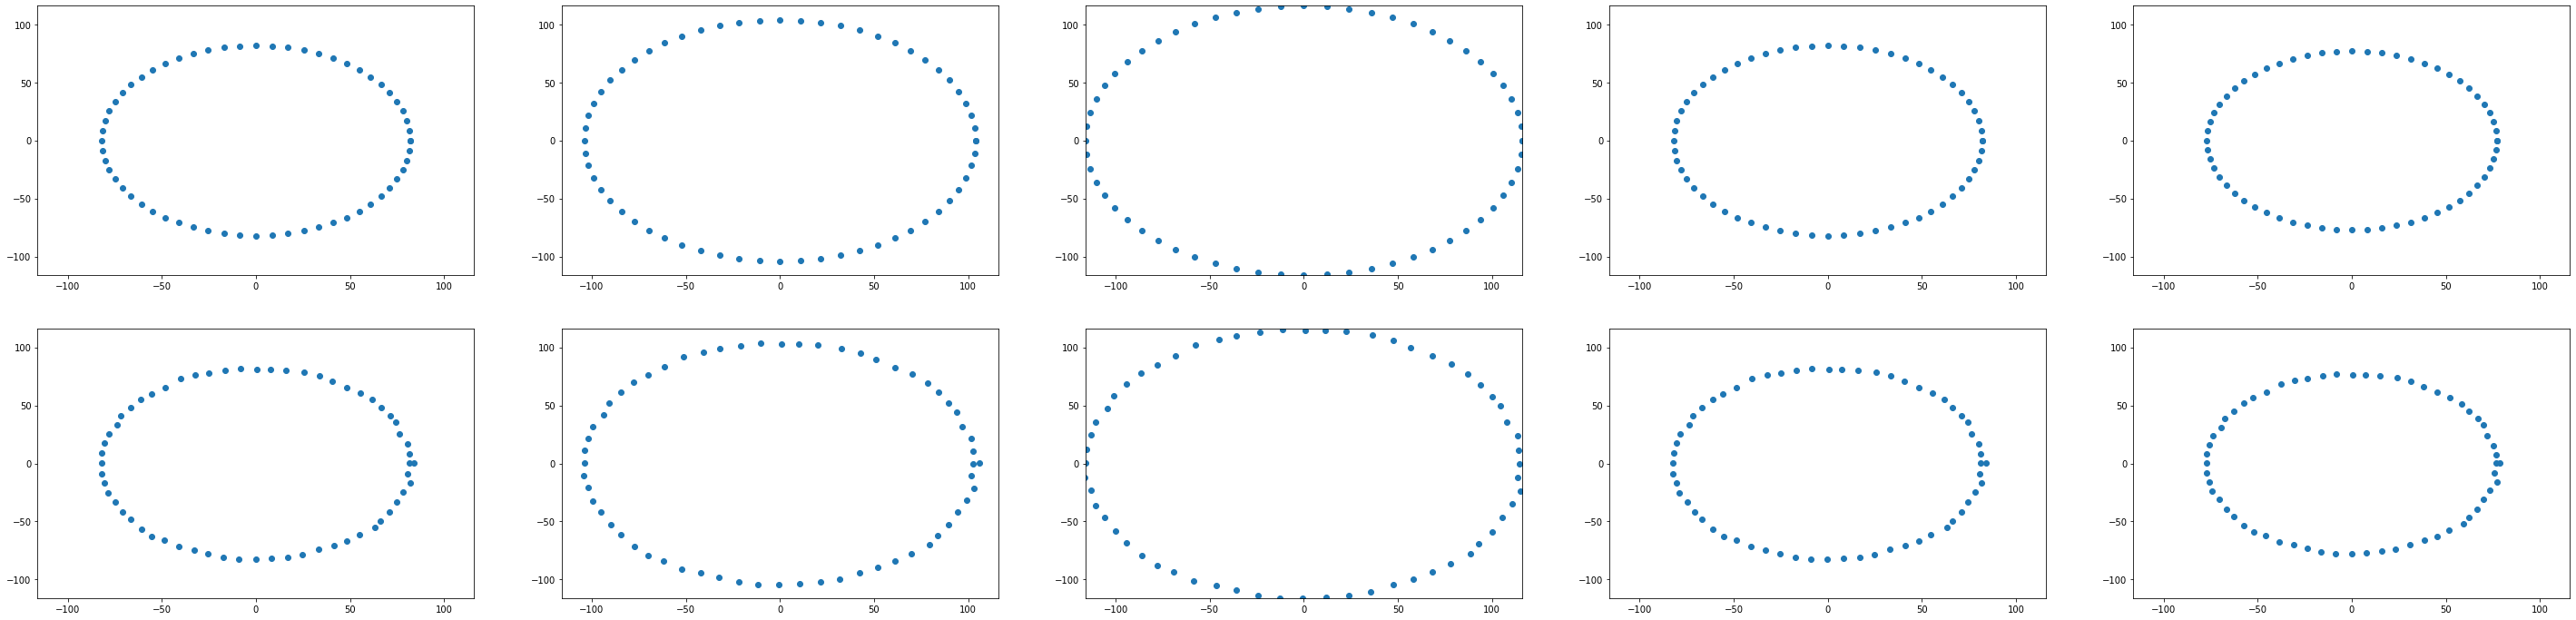

In [ ]:
import matplotlib.pyplot as plt

n = 5  # How many digits we will display
plt.figure(figsize=(50, 12))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.xlim([data_test_x.min().min(), data_test_x.max().max()])
    plt.ylim([data_test_y.min().min(), data_test_y.max().max()])
    plt.scatter(data_test_x.iloc[i],data_test_y.iloc[i])
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.xlim([data_test_x.min().min(), data_test_x.max().max()])
    plt.ylim([data_test_y.min().min(), data_test_y.max().max()])    
    plt.scatter(data_test_xdush[i],data_test_ydush[i])
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()
